In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as constants
import scipy.integrate as integrate
from pytransit import QuadraticModel
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

%matplotlib inline

plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140

In [18]:
def perform_fft(x, y, plottimeseries=True, plotfrequencies=True, removezerofreq=False):
    if plottimeseries:
        plot_ts(x,y)
    T = get_period(x)
    N = len(x)
    frequencies = fftfreq(N, T)
    # second half of freqs is -ve. We can ignore this as it is symmetrical
    frequencies = frequencies[:N//2] 

    transformed = fft(y)
    # take only first half as is symmetrical for -ve numbers and we can ignore.
    transformed = np.abs(transformed[:N//2])
    
    if removezerofreq and frequencies[0] == 0.0:
        transformed[0] = 0
    
    if plotfrequencies:
        width = (frequencies[-1] - frequencies[0]) / len(frequencies)
        freq_fig, freq_ax = plt.subplots()
        freq_ax.bar(frequencies, 2.0 / N * transformed, width=width)
#         freq_ax.xaxis.set_major_locator(MultipleLocator(10))
#         freq_ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#         freq_ax.grid(which='major', color='#CCCCCC', linestyle='--')
#         freq_ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    return (frequencies, transformed)


def average(data):
    data = np.nan_to_num(data, nan=0)
    return sum(data) / len(data)

def get_period(arr):
    period = []
    for i in range(1, len(arr)):
        period.append(arr[i] - arr[i - 1])
    period = average(period)
    return period

def plot_ts(x,y):
    fig, ax = plt.subplots()
    ax.plot(x,y,'k.',markersize=1)
    return fig, ax

[1.998]


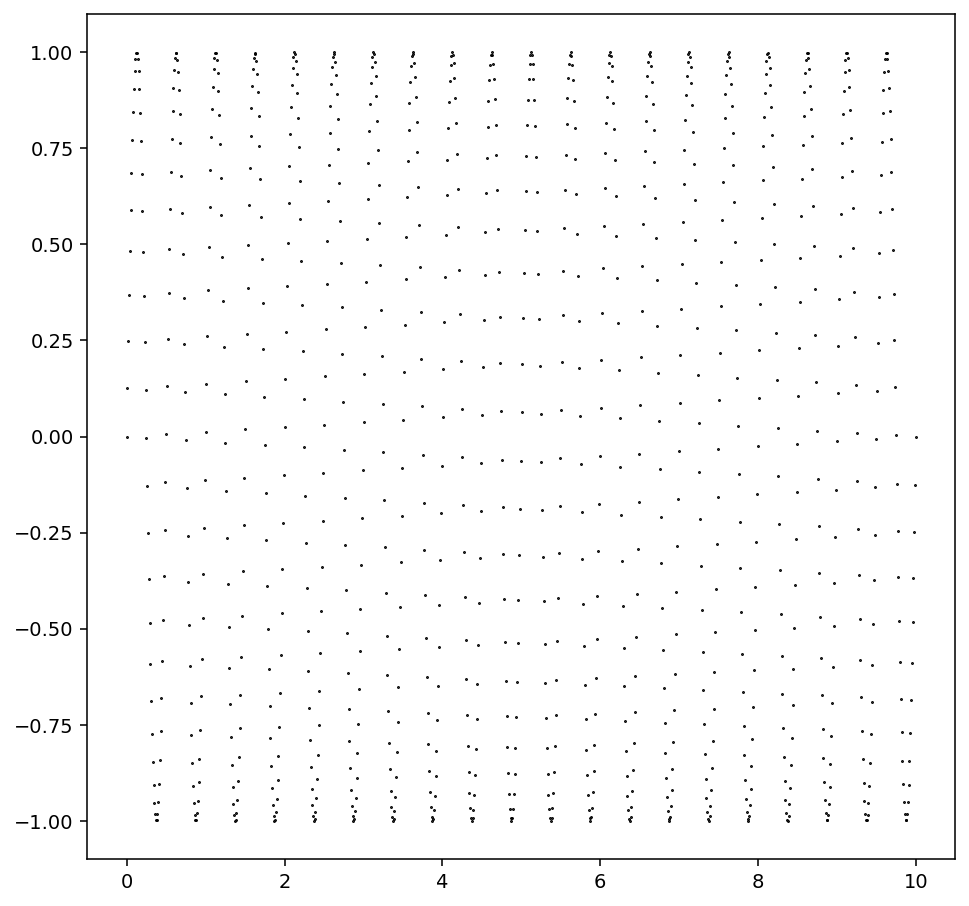

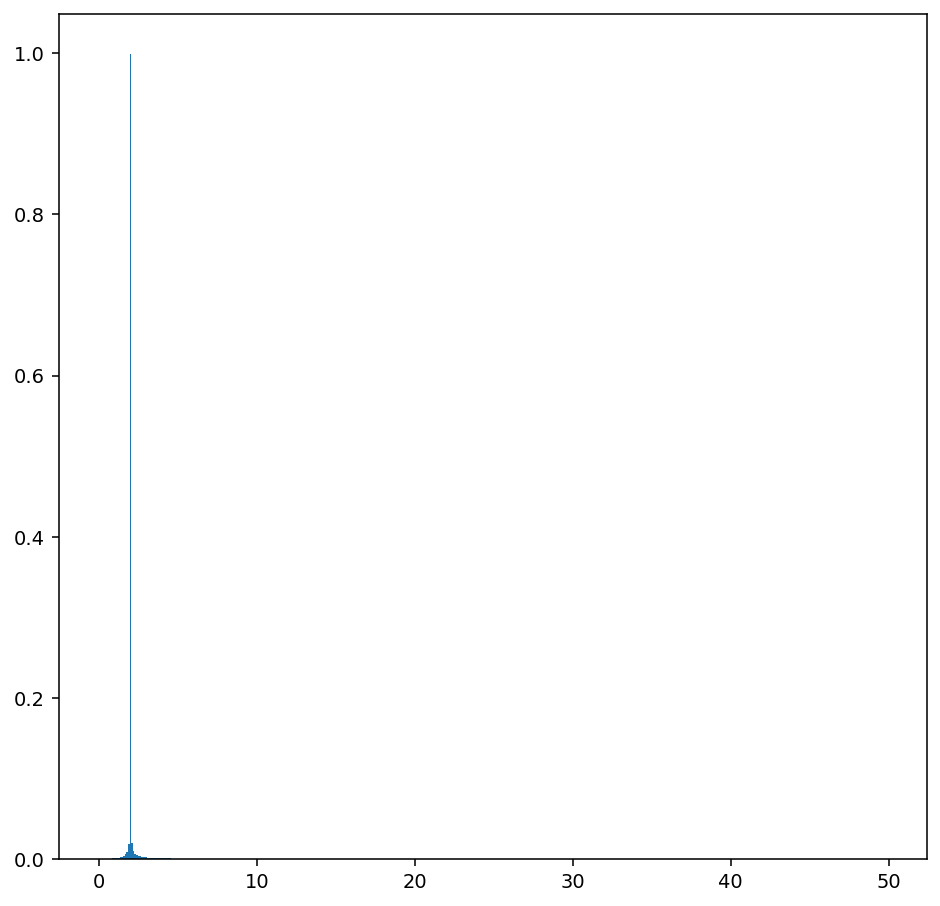

In [22]:
x = np.linspace(0, 10, 1000)
y = np.sin(x*2*(2*np.pi))

freq, trans = perform_fft(x,y)
print(freq[np.where(trans == max(trans))[0]])

In [3]:
x = np.arange(0, 200, 0.1)
flux_star = 100.0
r_star = 1.261 * constants.R_sun.value
r_planet = 16.20 * constants.R_earth.value
orbital_period = 2.18053539
orbital_radius = 0.03558 * constants.au.value

t_dur = transit_duration(p=orbital_period, r_star=r_star, r_planet=r_planet, b=0.201, a=orbital_radius)


NameError: name 'transit_duration' is not defined

In [51]:
x = np.linspace(-0.5, 0.5, 1000)
tm = QuadraticModel()
tm.set_data(x)
y = tm.evaluate(k=r_star/r_planet, ldc=[0.1, 0.2], t0=50.0, p=orbital_period, a=orbital_radius, i=0)

k, t0, p, a, i, e, w  = 0.1, 0., 2.18, 3.2, 0.5*np.pi, 0.3, 0.4*np.pi
flux = tm.evaluate(k, [100,0.2], t0, p, a, i, e, w)

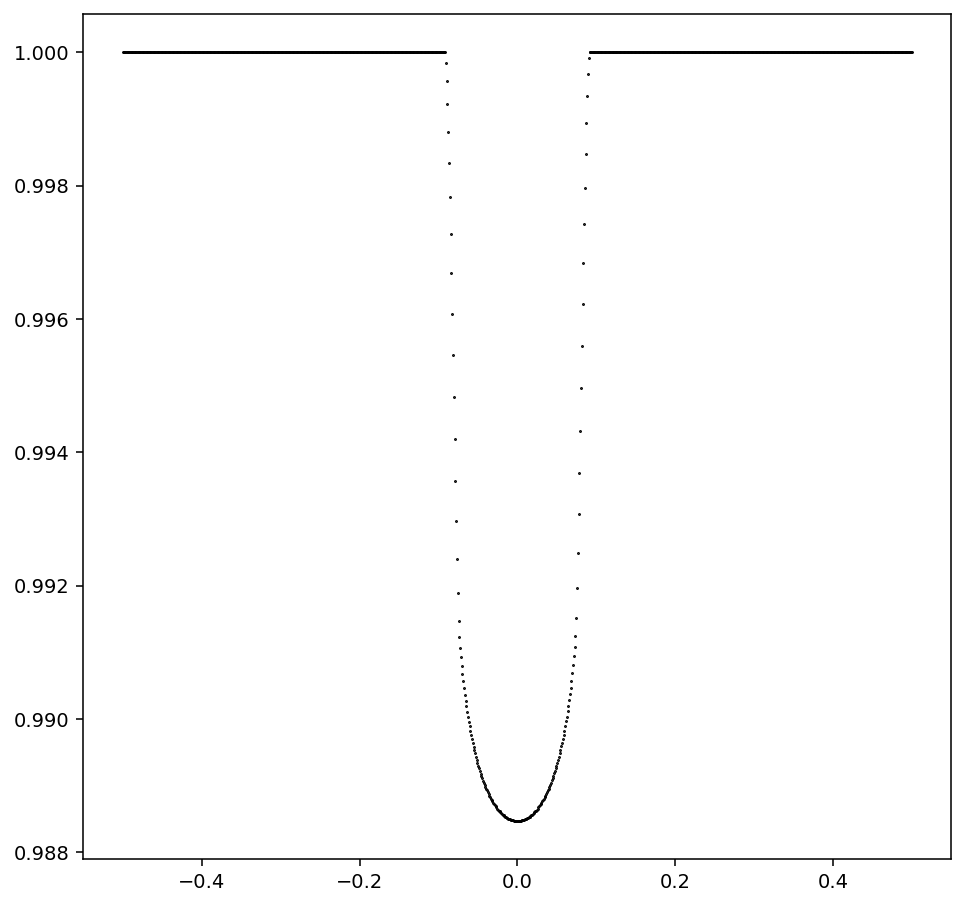

In [49]:
fig, ax = plt.subplots()
ax.plot(x,flux,'k.', markersize=1)

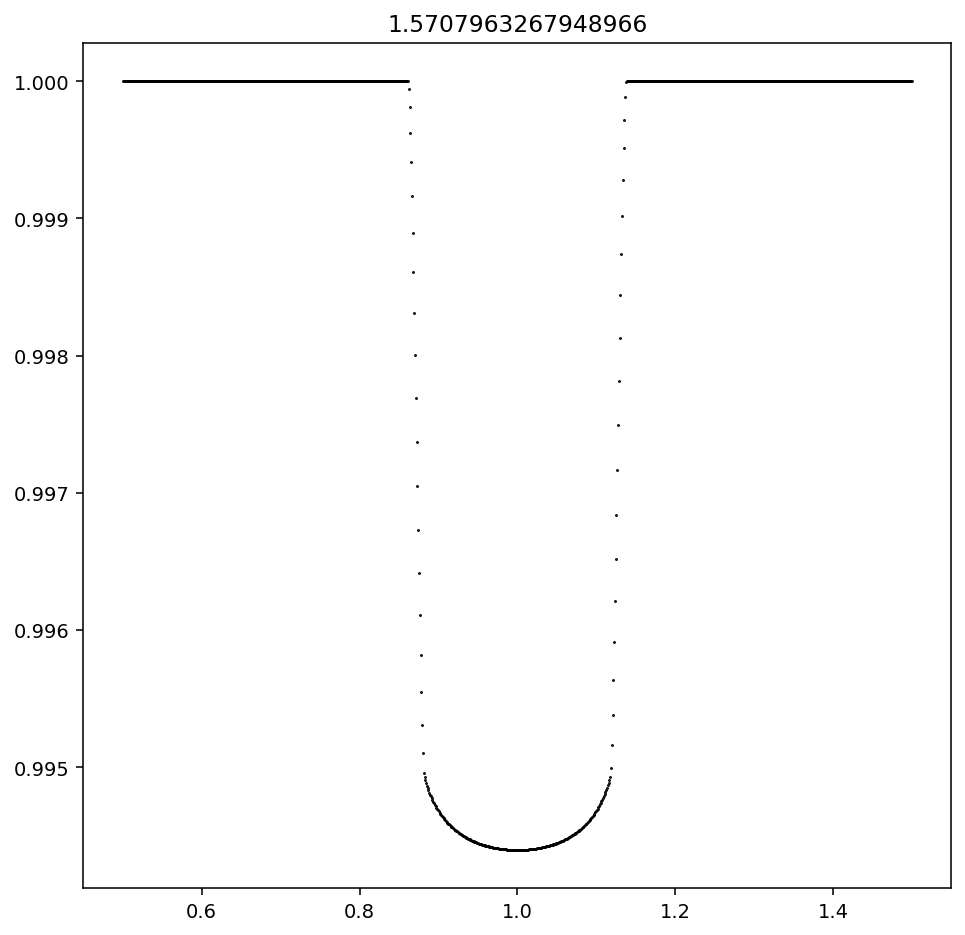

In [11]:
# k, t0, p, a, i, e, w, ld1, ld2  = 0.1, 1., 2.1, 3.2, 0.5*np.pi, 0.3, 0.4*np.pi, 0.2, 0.2
k, t0, p, a, i, e, w, ld1, ld2 = 0.0731, 1., 3.320, 3.148, 2.489, 0.3, 0.4*np.pi, 0.0983, 0.0821
k, t0, p, a, i, e, w, ld1, ld2 = 0.0731, 1., 3.320, 3.148, 0.5*np.pi, 0.3, 0.4*np.pi, 0.0983, 0.0821

x = np.linspace(0.5, 1.5, 1000)
# for var in np.linspace(0.1, 10, 10):
# #     for j in reversed(np.arange(0, 1, 0.1)):
#     tm = QuadraticModel()
#     tm.set_data(x)
#     flux = tm.evaluate(k, [0.2,0.2], t0, p, var, i, e, w)
#     fig, ax = plt.subplots()
#     ax.title.set_text(i)
#     ax.plot(x,flux,'k.', markersize=1)

tm = QuadraticModel()
tm.set_data(x)
flux = tm.evaluate(k, [ld1, ld2], t0, p, a, i, e, w)

fig, ax = plt.subplots()
ax.title.set_text(i)
ax.plot(x,flux,'k.', markersize=1)

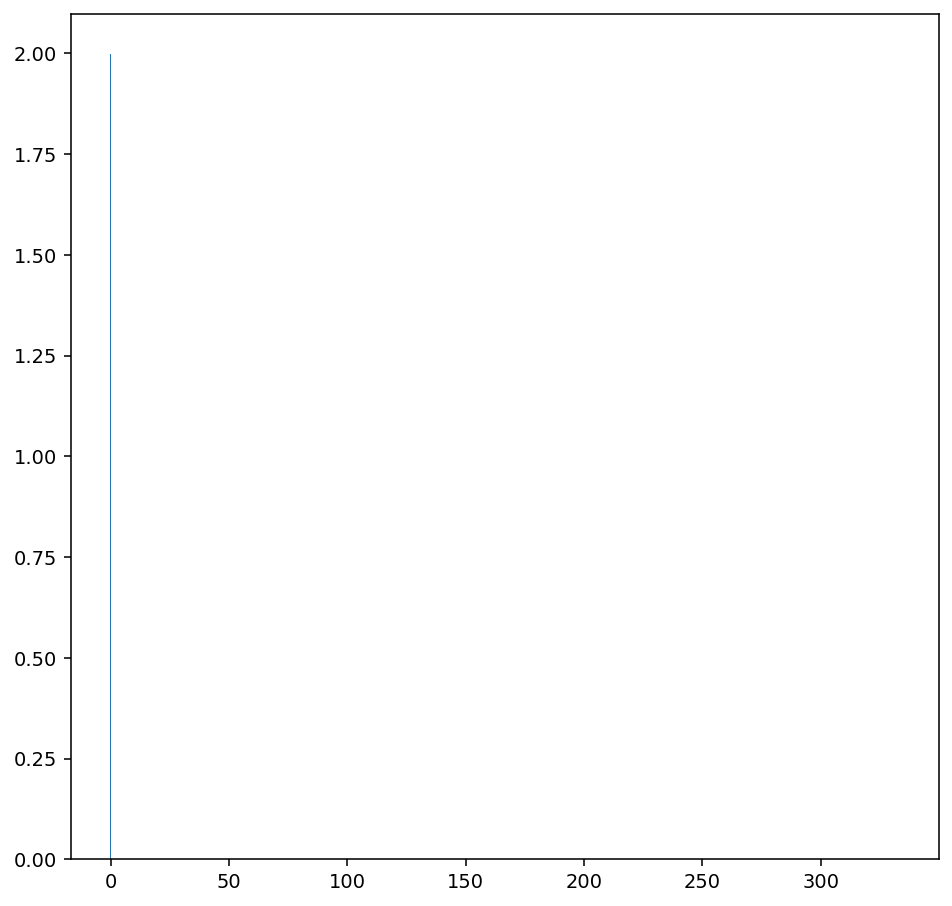

In [6]:
freq, trans = perform_fft(x, flux, x[1]-x[0] ,plottimeseries=False)

In [16]:
freq[np.where(trans == max(trans))[0]], 2/len(x)*max(trans)

(array([0.]), 1.9984344471434874)

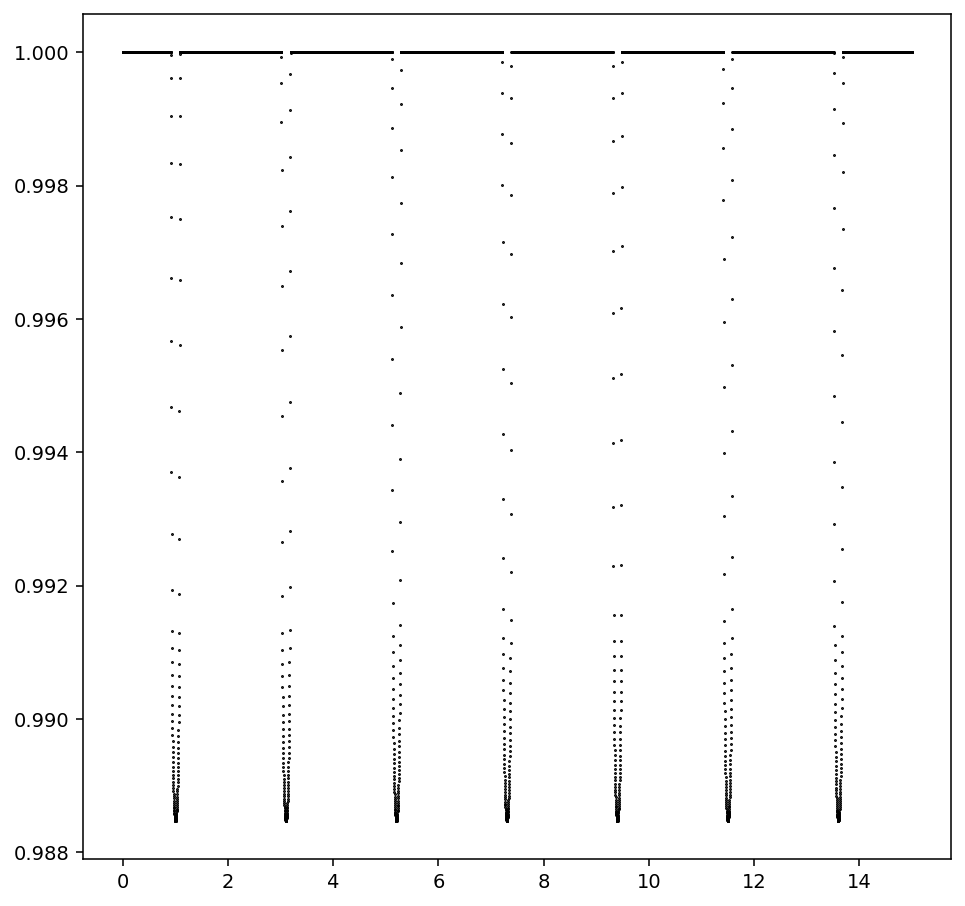

In [17]:
fig, ax = plt.subplots()
ax.plot(x,flux,'k.', markersize=1)


In [279]:
x=np.linspace(0, 1, 500)
y=np.full(len(x), 0)

present_freqs = np.array([20])

freq_count = {}
for i in range(len(x)):
    for j in present_freqs:
        tp = 1/j
        if x[i] <= freq_count.get(j, 0) < x[min(i+1, len(x)-1)]:
            y[i] += 1
            if i < len(y) - 1:
                y[i+1] -= 1
            cur = freq_count.get(j,0)
            freq_count.update({j:freq_count.get(j,0) + tp})

del freq_count

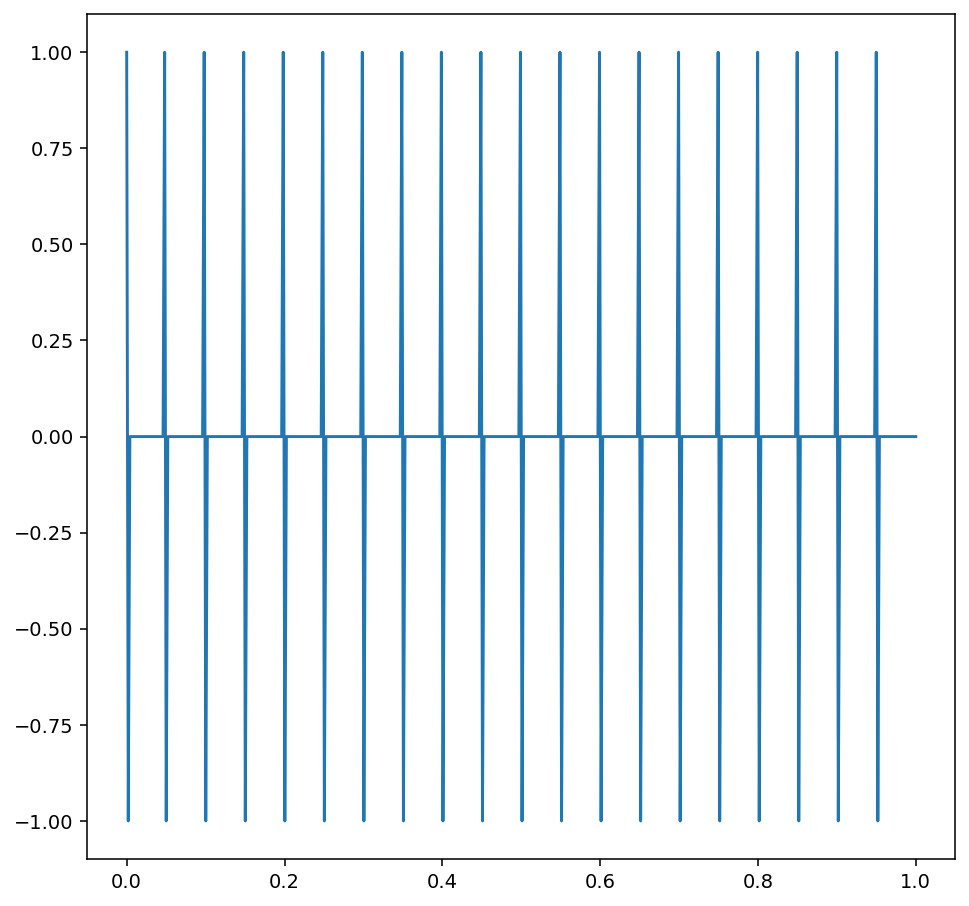

In [281]:
fig,ax = plt.subplots()
ax.plot(x, y)

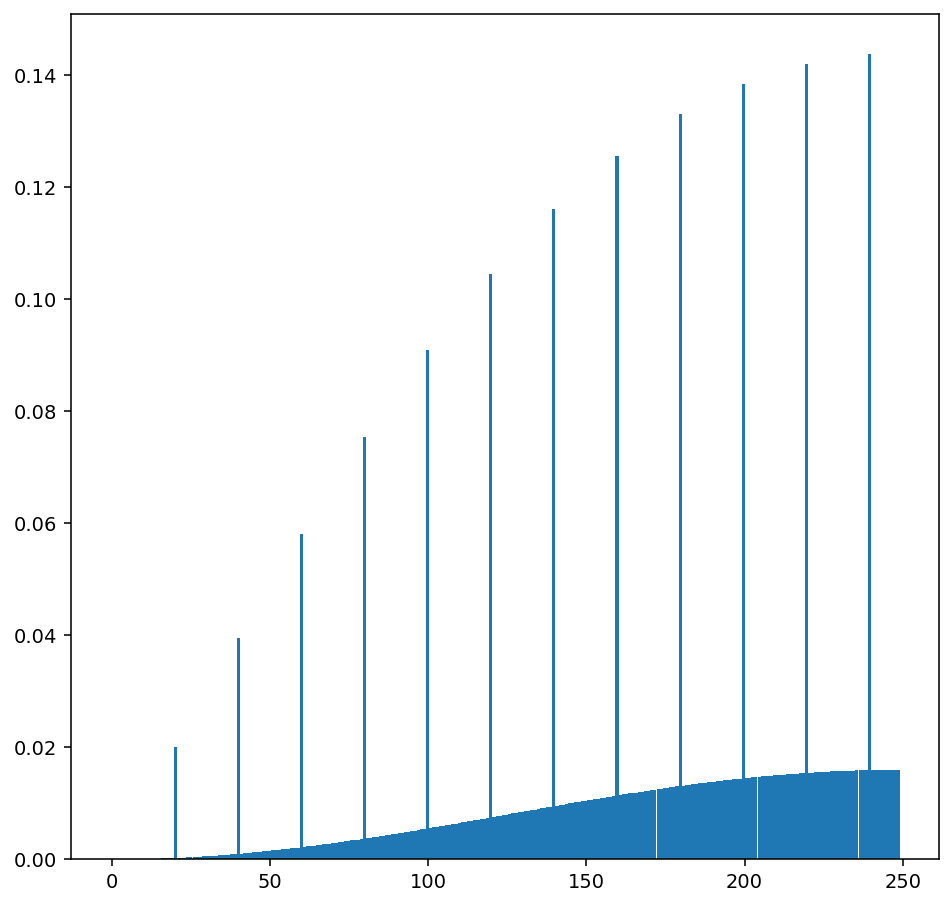

In [282]:
freq, trans = perform_fft(x,y,x[1]-x[0],plottimeseries=False, removezerofreq=True)

In [283]:
best_freq = freq[np.where(trans == max(trans))[0]][0]
2/len(x)*max(trans)
best_freq

239.52000000000004

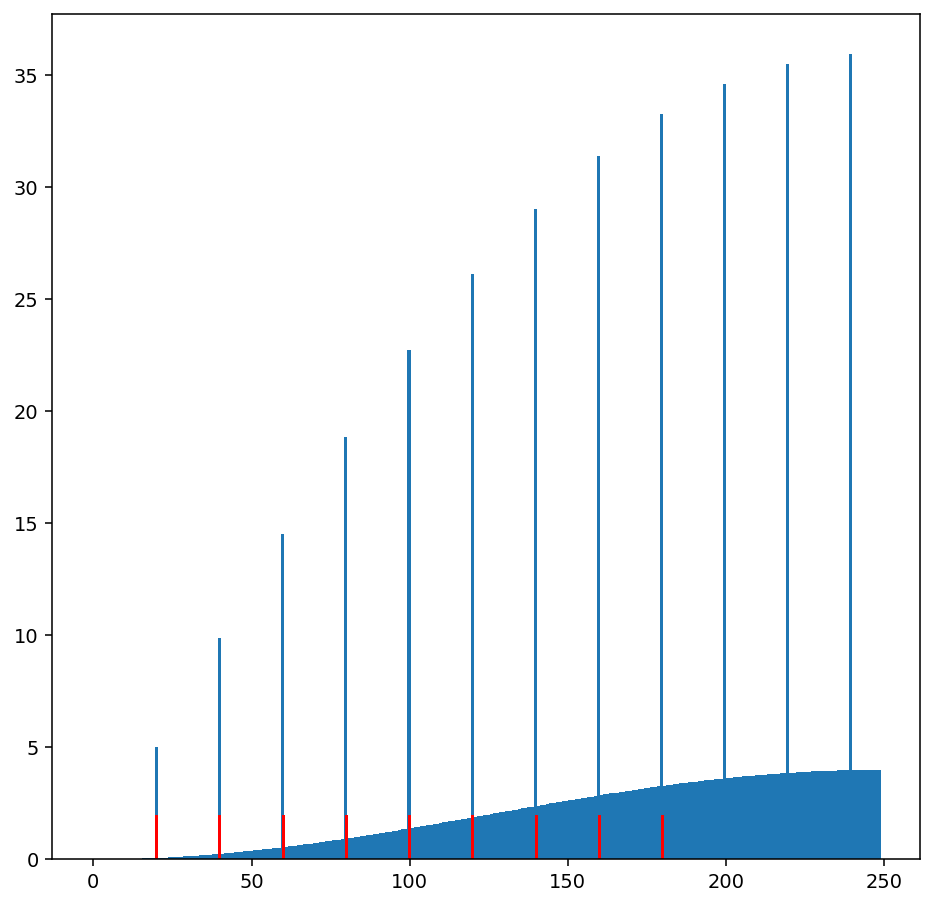

In [288]:
fig, ax = plt.subplots()
ax.bar(freq, trans, width=1)
for i in range(1, 10):
    ax.bar(i*present_freqs, [2]*len(present_freqs), width=1, color=['r','g'])
# ax.xaxis.set_major_locator(MultipleLocator(0.1))
# ax.xaxis.set_minor_locator(AutoMinorLocator(0.02))
# ax.grid(which='major', color='#CCCCCC', linestyle='--')
# ax.grid(which='minor', color='#CCCCCC', linestyle=':')

In [289]:
best_freq


239.52000000000004

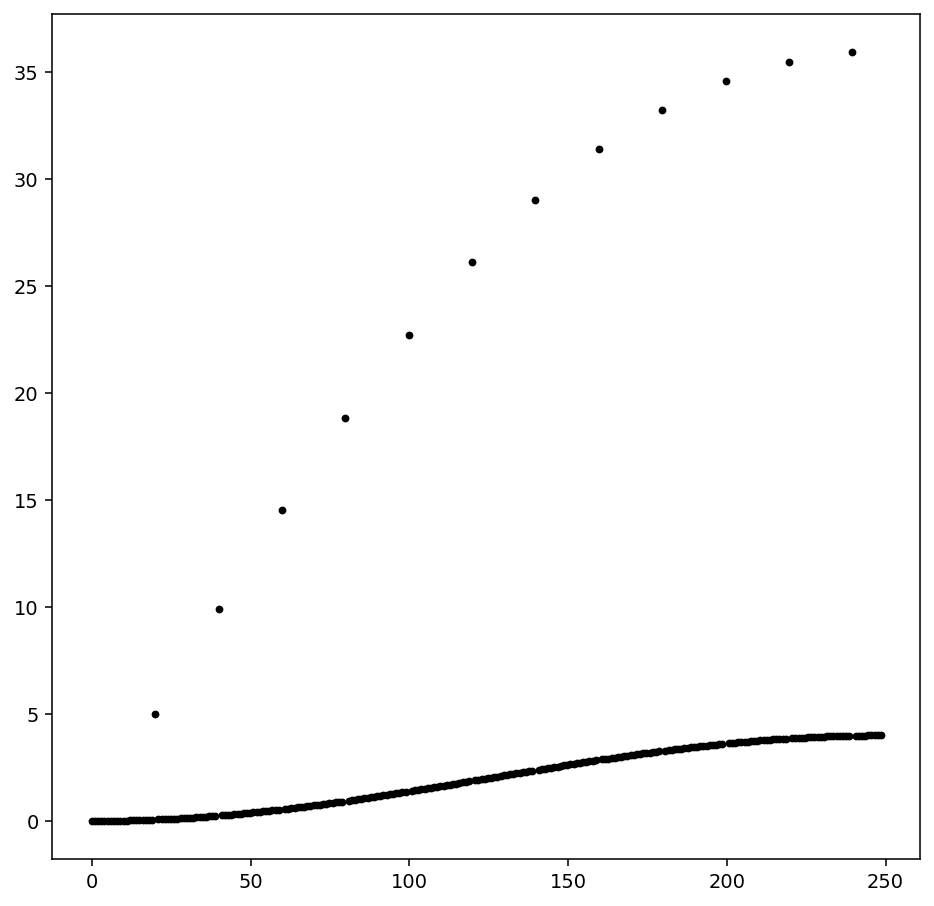

In [290]:
fig, ax = plt.subplots()
ax.plot(freq, trans, 'k.')

In [292]:
peaks, properties = find_peaks(trans, height=1)

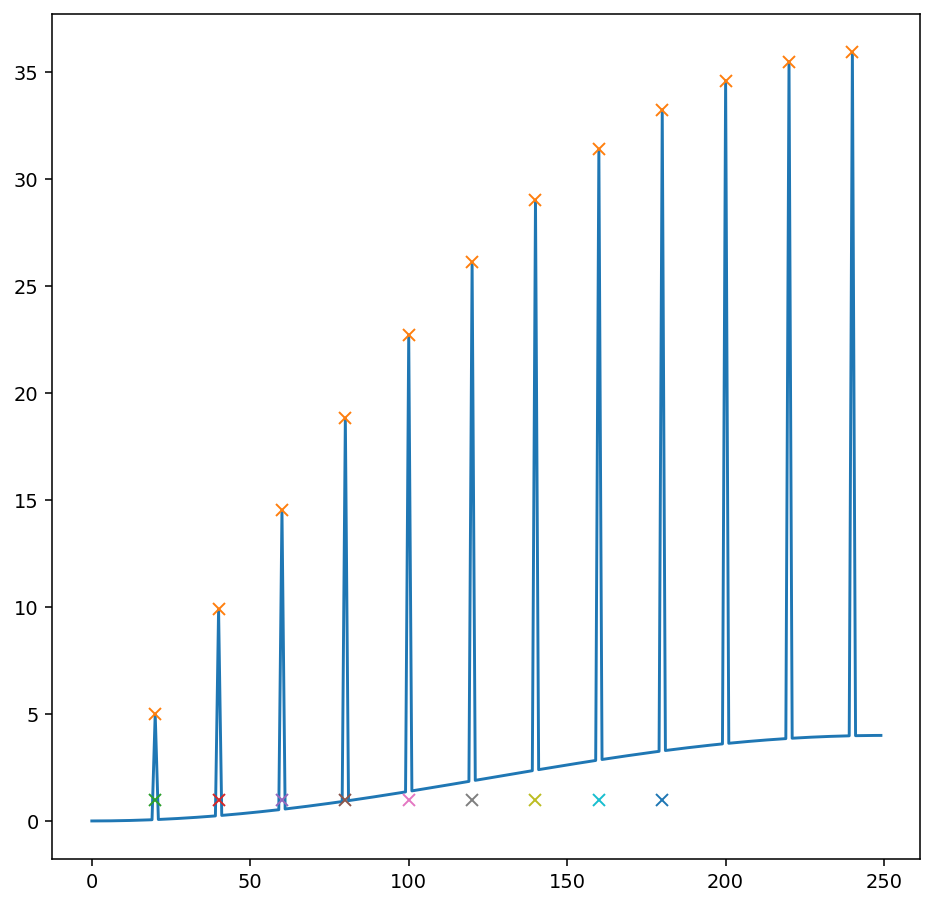

In [294]:
fig, ax = plt.subplots()
ax.plot(trans)
ax.plot(peaks, trans[peaks], 'x')
for i in range(1, 10):
    for freq in present_freqs:
        ax.plot(i*freq, 1, marker='x')

In [198]:
peaks, trans[peaks]


(array([ 20,  31,  40,  60,  62,  80,  92, 100, 120, 123, 140, 154, 160,
        180, 185]),
 array([ 6.25940892, 13.65388214, 12.97871376, 19.0430147 , 19.7469331 ,
        24.6869806 , 34.8261687 , 28.31960452, 33.97871376, 50.50181196,
        35.64137852, 55.73480728, 39.94437368, 39.69729875, 47.46268948]))

In [199]:
frequencies[peaks]

array([ 19.95  ,  30.9225,  39.9   ,  59.85  ,  61.845 ,  79.8   ,
        91.77  ,  99.75  , 119.7   , 122.6925, 139.65  , 153.615 ,
       159.6   , 179.55  , 184.5375])